In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Data

In [2]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

#dim ethen
dim = 48

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethen_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethen_6-31g**.npy"), dim), 
)

[-] 2018-04-27 22:56:44: Data set normalized. Mean value std: 0.01571842310333243


# Ethan
dim = 48

dim^2 = 2304

dim_ut = 1176

In [3]:
dim_triu = int(dim * (dim + 1) / 2)

In [5]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_triu, dim_triu, dim_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset,
    convergence_threshold=5e-7
)
graph = trainer.graph

[ ] 2018-04-27 22:57:04: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7f0838fe6908>
[-] 2018-04-27 22:57:04: Setting up the training in the target graph ...
[-] 2018-04-27 22:57:04: network ...
[-] 2018-04-27 22:57:04: error function ...
[-] 2018-04-27 22:57:04: cost function ...
[-] 2018-04-27 22:57:04: training step
[-] 2018-04-27 22:57:05: Starting network training ...
[ ] 2018-04-27 22:57:05: Val. Cost: 1.580E-02. Error: 1.578E-02. Diff: 1.0E+10
[ ] 2018-04-27 22:57:08: Val. Cost: 1.768E-04. Error: 1.668E-04. Diff: 1.6E-02
[ ] 2018-04-27 22:57:11: Val. Cost: 5.919E-05. Error: 4.942E-05. Diff: 1.2E-04
[ ] 2018-04-27 22:57:14: Val. Cost: 3.925E-05. Error: 2.960E-05. Diff: 2.0E-05
[ ] 2018-04-27 22:57:18: Val. Cost: 4.897E-05. Error: 3.948E-05. Diff: 9.9E-06
[ ] 2018-04-27 22:57:21: Val. Cost: 5.176E-05. Error: 4.262E-05. Diff: 3.1E-06
[ ] 2018-04-27 22:57:24: Val. Cost: 3.738E-05. Error: 2.851E-05. Diff: 1.4E-05
[ ] 2018-04-27 22:57:27: Val. Cost: 8.135E-05.

In [6]:
p = network.run(sess, dataset.testing[0])

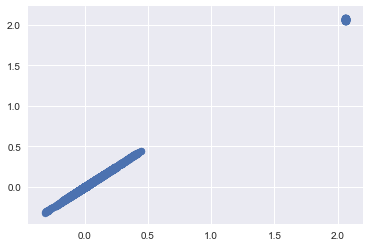

In [7]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [8]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 22:59:03: Iteration calculation: 0
[ ] 2018-04-27 22:59:03: Iteration calculation: 1


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:03: Iteration calculation: 2
[ ] 2018-04-27 22:59:03: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:03: Iteration calculation: 4
[ ] 2018-04-27 22:59:04: Iteration calculation: 5


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:04: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:04: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:05: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:05: Iteration calculation: 9
[ ] 2018-04-27 22:59:05: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:06: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:06: Iteration calculation: 12
[ ] 2018-04-27 22:59:06: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:06: Iteration calculation: 14
[ ] 2018-04-27 22:59:06: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:07: Iteration calculation: 16
[ ] 2018-04-27 22:59:07: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:07: Iteration calculation: 18
[ ] 2018-04-27 22:59:07: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:07: Iteration calculation: 20
[ ] 2018-04-27 22:59:07: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:08: Iteration calculation: 22
[ ] 2018-04-27 22:59:08: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:08: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:08: Iteration calculation: 25
[ ] 2018-04-27 22:59:08: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:09: Iteration calculation: 27
[ ] 2018-04-27 22:59:09: Iteration calculation: 28


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:09: Iteration calculation: 29
[ ] 2018-04-27 22:59:09: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:09: Iteration calculation: 31
[ ] 2018-04-27 22:59:09: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:10: Iteration calculation: 33
[ ] 2018-04-27 22:59:10: Iteration calculation: 34


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:10: Iteration calculation: 35
[ ] 2018-04-27 22:59:10: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:10: Iteration calculation: 37
[ ] 2018-04-27 22:59:10: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:11: Iteration calculation: 39
[ ] 2018-04-27 22:59:11: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:11: Iteration calculation: 41
[ ] 2018-04-27 22:59:11: Iteration calculation: 42


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:11: Iteration calculation: 43
[ ] 2018-04-27 22:59:11: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:12: Iteration calculation: 45
[ ] 2018-04-27 22:59:12: Iteration calculation: 46


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:12: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:12: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:12: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [9]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
9.72321E-04 +- 1.21353E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
1.55521E-03 +- 2.11538E-04
--- Occupance Error ---
1.60119E+01 +- 6.68911E-02
--- Avg. Iterations ---
1.30000E+01 +- 2.80713E+00



## McWheeny that shit

In [10]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [11]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [12]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [13]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 22:59:13: Iteration calculation: 0
[ ] 2018-04-27 22:59:13: Iteration calculation: 1


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:13: Iteration calculation: 2
[ ] 2018-04-27 22:59:13: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:14: Iteration calculation: 4
[ ] 2018-04-27 22:59:14: Iteration calculation: 5


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:14: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:14: Iteration calculation: 7
[ ] 2018-04-27 22:59:15: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:15: Iteration calculation: 9
[ ] 2018-04-27 22:59:15: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:15: Iteration calculation: 11
[ ] 2018-04-27 22:59:15: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:16: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:16: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:16: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:16: Iteration calculation: 16
[ ] 2018-04-27 22:59:17: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:17: Iteration calculation: 18
[ ] 2018-04-27 22:59:17: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:17: Iteration calculation: 20
[ ] 2018-04-27 22:59:17: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:17: Iteration calculation: 22
[ ] 2018-04-27 22:59:18: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:18: Iteration calculation: 24
[ ] 2018-04-27 22:59:18: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:18: Iteration calculation: 26
[ ] 2018-04-27 22:59:18: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:18: Iteration calculation: 28
[ ] 2018-04-27 22:59:19: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:19: Iteration calculation: 30
[ ] 2018-04-27 22:59:19: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:19: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:19: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:20: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:20: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:20: Iteration calculation: 36
[ ] 2018-04-27 22:59:20: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:20: Iteration calculation: 38
[ ] 2018-04-27 22:59:20: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:21: Iteration calculation: 40
[ ] 2018-04-27 22:59:21: Iteration calculation: 41


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:21: Iteration calculation: 42
[ ] 2018-04-27 22:59:21: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:21: Iteration calculation: 44
[ ] 2018-04-27 22:59:21: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:21: Iteration calculation: 46
[ ] 2018-04-27 22:59:22: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:22: Iteration calculation: 48
[ ] 2018-04-27 22:59:22: Iteration calculation: 49


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


In [14]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
5.33523E-04 +- 7.85620E-05
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.22524E-05 +- 7.10809E-06
--- Occupance Error ---
1.59981E+01 +- 1.27211E-03
--- Avg. Iterations ---
1.05200E+01 +- 2.51587E+00



In [15]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 22:59:22: Iteration calculation: 0
[ ] 2018-04-27 22:59:22: Iteration calculation: 1


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:23: Iteration calculation: 2
[ ] 2018-04-27 22:59:23: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:23: Iteration calculation: 4
[ ] 2018-04-27 22:59:23: Iteration calculation: 5


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:23: Iteration calculation: 6
[ ] 2018-04-27 22:59:23: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:24: Iteration calculation: 8
[ ] 2018-04-27 22:59:24: Iteration calculation: 9


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:24: Iteration calculation: 10
[ ] 2018-04-27 22:59:24: Iteration calculation: 11


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:24: Iteration calculation: 12
[ ] 2018-04-27 22:59:24: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:25: Iteration calculation: 14
[ ] 2018-04-27 22:59:25: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:25: Iteration calculation: 16
[ ] 2018-04-27 22:59:25: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:25: Iteration calculation: 18
[ ] 2018-04-27 22:59:25: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:25: Iteration calculation: 20
[ ] 2018-04-27 22:59:26: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:26: Iteration calculation: 22
[ ] 2018-04-27 22:59:26: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:26: Iteration calculation: 24
[ ] 2018-04-27 22:59:26: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:26: Iteration calculation: 26
[ ] 2018-04-27 22:59:27: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:27: Iteration calculation: 28
[ ] 2018-04-27 22:59:27: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:27: Iteration calculation: 30
[ ] 2018-04-27 22:59:27: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:27: Iteration calculation: 32
[ ] 2018-04-27 22:59:27: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:28: Iteration calculation: 34
[ ] 2018-04-27 22:59:28: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:28: Iteration calculation: 36
[ ] 2018-04-27 22:59:28: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:28: Iteration calculation: 38
[ ] 2018-04-27 22:59:29: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:29: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:29: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:29: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:29: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:30: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:30: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:30: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:31: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:31: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:31: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [16]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
5.32446E-04 +- 7.84614E-05
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.50205E-17 +- 1.95899E-18
--- Occupance Error ---
1.60000E+01 +- 2.14638E-15
--- Avg. Iterations ---
1.05600E+01 +- 2.44262E+00



## Classical Ethan

In [17]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [18]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:45: Iteration calculation: 0
[ ] 2018-04-27 22:59:45: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:46: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:46: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:46: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:46: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:47: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:47: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:47: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:47: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:48: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:48: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:48: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:49: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:49: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:49: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:49: Iteration calculation: 16
[ ] 2018-04-27 22:59:50: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:50: Iteration calculation: 18
[ ] 2018-04-27 22:59:50: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:50: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:50: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:51: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:51: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:51: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:52: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:52: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:52: Iteration calculation: 27
[ ] 2018-04-27 22:59:53: Iteration calculation: 28


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:53: Iteration calculation: 29
[ ] 2018-04-27 22:59:53: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:53: Iteration calculation: 31
[ ] 2018-04-27 22:59:53: Iteration calculation: 32
[ ] 2018-04-27 22:59:54: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:54: Iteration calculation: 34
[ ] 2018-04-27 22:59:54: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:54: Iteration calculation: 36
[ ] 2018-04-27 22:59:54: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:55: Iteration calculation: 38
[ ] 2018-04-27 22:59:55: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:55: Iteration calculation: 40
[ ] 2018-04-27 22:59:55: Iteration calculation: 41


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:55: Iteration calculation: 42
[ ] 2018-04-27 22:59:55: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:56: Iteration calculation: 44
[ ] 2018-04-27 22:59:56: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:56: Iteration calculation: 46
[ ] 2018-04-27 22:59:56: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:56: Iteration calculation: 48
[ ] 2018-04-27 22:59:57: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [19]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.87433E-02 +- 6.30930E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.05776E-02 +- 5.83638E-04
--- Occupance Error ---
1.60000E+01 +- 3.86740E-15
--- Avg. Iterations ---
1.29400E+01 +- 2.31006E+00



In [20]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 22:59:57: Iteration calculation: 0
[ ] 2018-04-27 22:59:57: Iteration calculation: 1


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:57: Iteration calculation: 2
[ ] 2018-04-27 22:59:57: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:57: Iteration calculation: 4
[ ] 2018-04-27 22:59:58: Iteration calculation: 5


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:58: Iteration calculation: 6
[ ] 2018-04-27 22:59:58: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:58: Iteration calculation: 8
[ ] 2018-04-27 22:59:58: Iteration calculation: 9


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:58: Iteration calculation: 10
[ ] 2018-04-27 22:59:59: Iteration calculation: 11


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:59: Iteration calculation: 12
[ ] 2018-04-27 22:59:59: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:59: Iteration calculation: 14
[ ] 2018-04-27 22:59:59: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:59:59: Iteration calculation: 16
[ ] 2018-04-27 23:00:00: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:00: Iteration calculation: 18
[ ] 2018-04-27 23:00:00: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:00: Iteration calculation: 20
[ ] 2018-04-27 23:00:00: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:00: Iteration calculation: 22
[ ] 2018-04-27 23:00:00: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:01: Iteration calculation: 24
[ ] 2018-04-27 23:00:01: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:01: Iteration calculation: 26
[ ] 2018-04-27 23:00:01: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:01: Iteration calculation: 28
[ ] 2018-04-27 23:00:01: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:02: Iteration calculation: 30
[ ] 2018-04-27 23:00:02: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:02: Iteration calculation: 32
[ ] 2018-04-27 23:00:02: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:02: Iteration calculation: 34
[ ] 2018-04-27 23:00:02: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:03: Iteration calculation: 36
[ ] 2018-04-27 23:00:03: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:03: Iteration calculation: 38
[ ] 2018-04-27 23:00:03: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:03: Iteration calculation: 40
[ ] 2018-04-27 23:00:03: Iteration calculation: 41


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:04: Iteration calculation: 42
[ ] 2018-04-27 23:00:04: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:04: Iteration calculation: 44
[ ] 2018-04-27 23:00:04: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:04: Iteration calculation: 46
[ ] 2018-04-27 23:00:04: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:05: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:05: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [21]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.72247E-02 +- 6.19234E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.04812E-02 +- 6.78653E-04
--- Occupance Error ---
1.59862E+01 +- 1.05751E-04
--- Avg. Iterations ---
1.21400E+01 +- 2.12612E+00



In [22]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_gwh)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 23:00:05: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:06: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:06: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:06: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:06: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:07: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:07: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:07: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:07: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:08: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:08: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:08: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:08: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:09: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:09: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:09: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:10: Iteration calculation: 16
[ ] 2018-04-27 23:00:10: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:10: Iteration calculation: 18
[ ] 2018-04-27 23:00:10: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:11: Iteration calculation: 20
[ ] 2018-04-27 23:00:11: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:11: Iteration calculation: 22
[ ] 2018-04-27 23:00:11: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:11: Iteration calculation: 24
[ ] 2018-04-27 23:00:12: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:12: Iteration calculation: 26
[ ] 2018-04-27 23:00:12: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:12: Iteration calculation: 28
[ ] 2018-04-27 23:00:12: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:13: Iteration calculation: 30
[ ] 2018-04-27 23:00:13: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:13: Iteration calculation: 32
[ ] 2018-04-27 23:00:13: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:13: Iteration calculation: 34
[ ] 2018-04-27 23:00:14: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:14: Iteration calculation: 36
[ ] 2018-04-27 23:00:14: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:14: Iteration calculation: 38
[ ] 2018-04-27 23:00:14: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:15: Iteration calculation: 40
[ ] 2018-04-27 23:00:15: Iteration calculation: 41


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:15: Iteration calculation: 42
[ ] 2018-04-27 23:00:15: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:15: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:16: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:16: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:16: Iteration calculation: 47
[ ] 2018-04-27 23:00:16: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:00:16: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [23]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.31323E-02 +- 1.14529E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
5.01680E-17 +- 1.27403E-17
--- Occupance Error ---
1.60000E+01 +- 6.97545E-15
--- Avg. Iterations ---
1.33800E+01 +- 1.34000E+00

